# IMPORTING DEPENDENCY

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [4]:
df=pd.read_csv(r"C:\Users\User\Downloads\archive (57)\Clean Data_pakwheels.csv")
df.head()

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


# DATA PREPROCESSING

In [6]:
df['Company Name'].value_counts()

Company Name
Suzuki        15944
Toyota        15560
Honda          9245
Daihatsu       2281
Nissan          575
Mitsubishi      498
Mercedes        435
Hyundai         360
Audi            208
FAW             187
BMW             137
Mazda           120
Lexus            81
KIA              81
United           64
Subaru           58
Daewoo           48
Chevrolet        40
Range            33
SsangYong        13
Land             10
DFSK              9
Chery             8
Porsche           8
Jeep              6
MINI              5
Fiat              4
Hummer            1
Jaguar            1
Adam              1
Volvo             1
Name: count, dtype: int64

In [10]:
df.isnull().sum() # checking for null values

Unnamed: 0             0
Company Name           0
Model Name             0
Price                  0
Model Year             0
Location               0
Mileage                0
Engine Type            0
Engine Capacity        0
Color                  0
Assembly               0
Body Type              0
Transmission Type      0
Registration Status    0
dtype: int64

In [25]:
df.drop(['Unnamed: 0','Registration Status','Location'],axis=1,inplace=True) # dropping columns which is not important

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company Name       46022 non-null  object
 1   Model Name         46022 non-null  object
 2   Price              46022 non-null  int64 
 3   Model Year         46022 non-null  int64 
 4   Mileage            46022 non-null  int64 
 5   Engine Type        46022 non-null  object
 6   Engine Capacity    46022 non-null  int64 
 7   Color              46022 non-null  object
 8   Assembly           46022 non-null  object
 9   Body Type          46022 non-null  object
 10  Transmission Type  46022 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.9+ MB


In [29]:
# encoding categorical columns
Lab1=LabelEncoder()
Lab2=LabelEncoder()
Lab3=LabelEncoder()
Lab4=LabelEncoder()
Lab5=LabelEncoder()
Lab6=LabelEncoder()
Lab7=LabelEncoder()

In [31]:
df['Company Name'] = Lab1.fit_transform(df['Company Name'])
df['Model Name'] = Lab2.fit_transform(df['Model Name'])
df['Engine Type'] = Lab3.fit_transform(df['Engine Type'])
df['Color'] = Lab4.fit_transform(df['Color'])
df['Assembly'] = Lab5.fit_transform(df['Assembly'])
df['Body Type'] = Lab6.fit_transform(df['Body Type'])
df['Transmission Type'] = Lab7.fit_transform(df['Transmission Type'])

In [33]:
import joblib

In [35]:
joblib.dump(Lab1,'Lab1')# saving the encoded data for building streamlit

['Lab1']

In [139]:
joblib.dump(Lab2,'Lab2')

['Lab2']

In [141]:
joblib.dump(Lab3,'Lab3')

['Lab3']

In [143]:
joblib.dump(Lab4,'Lab4')

['Lab4']

In [145]:
joblib.dump(Lab5,'Lab5')

['Lab5']

In [147]:
joblib.dump(Lab6,'Lab6')

['Lab6']

In [160]:
joblib.dump(Lab7,'Lab7')

['Lab7']

## OUTLIER TREATMENT

<Axes: >

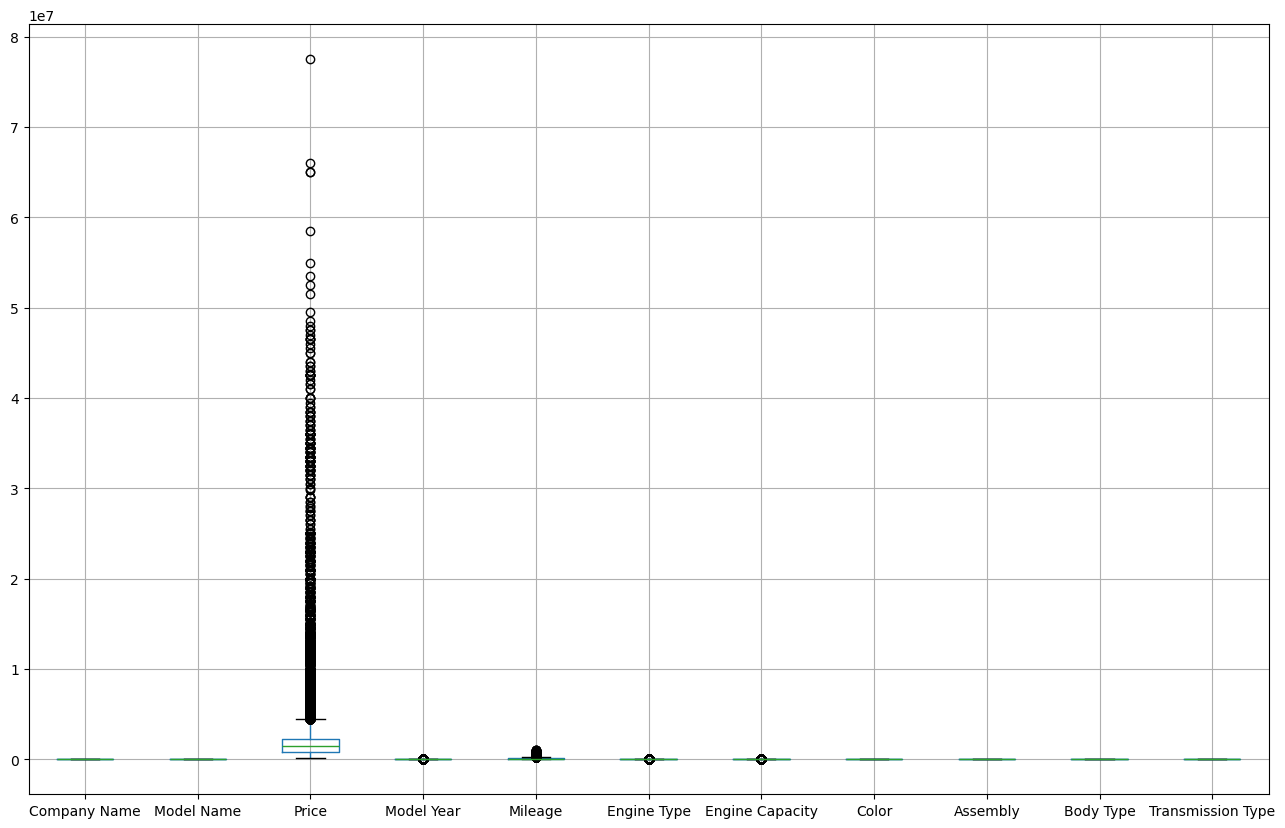

In [163]:
plt.figure(figsize=(16, 10))
df.boxplot()

In [166]:
q1=df["Price"].quantile(0.25)
q3=df["Price"].quantile(0.75)
iqr=q3-q1

lower=q1 -(1.5* iqr)
upper=q3 +(1.5 * iqr)
df["Price"] = df["Price"].clip(lower,upper)

# DATA VISUALIZATION

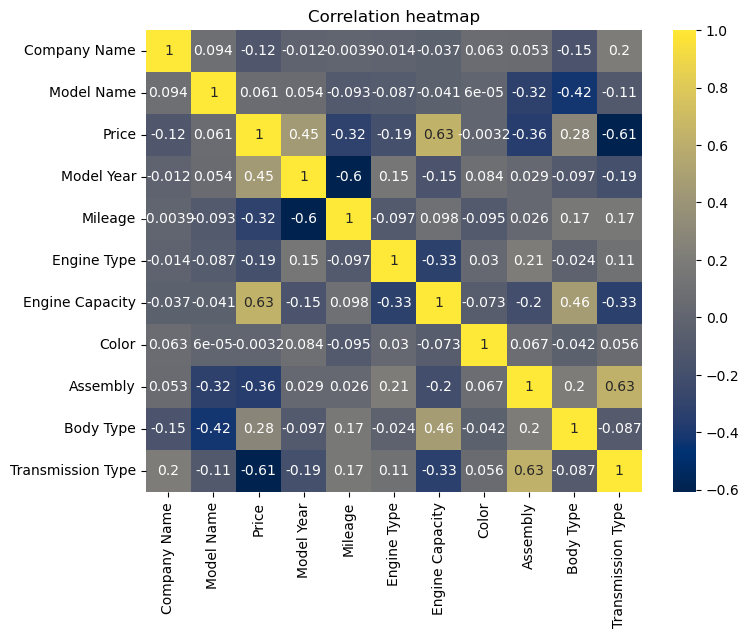

In [176]:
plt.figure(figsize=(8, 6))  
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="cividis")
plt.title("Correlation heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

Mutual Information Scores:
Model Name           0.854718
Engine Capacity      0.589538
Model Year           0.426375
Company Name         0.388365
Body Type            0.285624
Transmission Type    0.260559
Mileage              0.169070
Assembly             0.105585
Color                0.076233
Engine Type          0.049942
dtype: float64


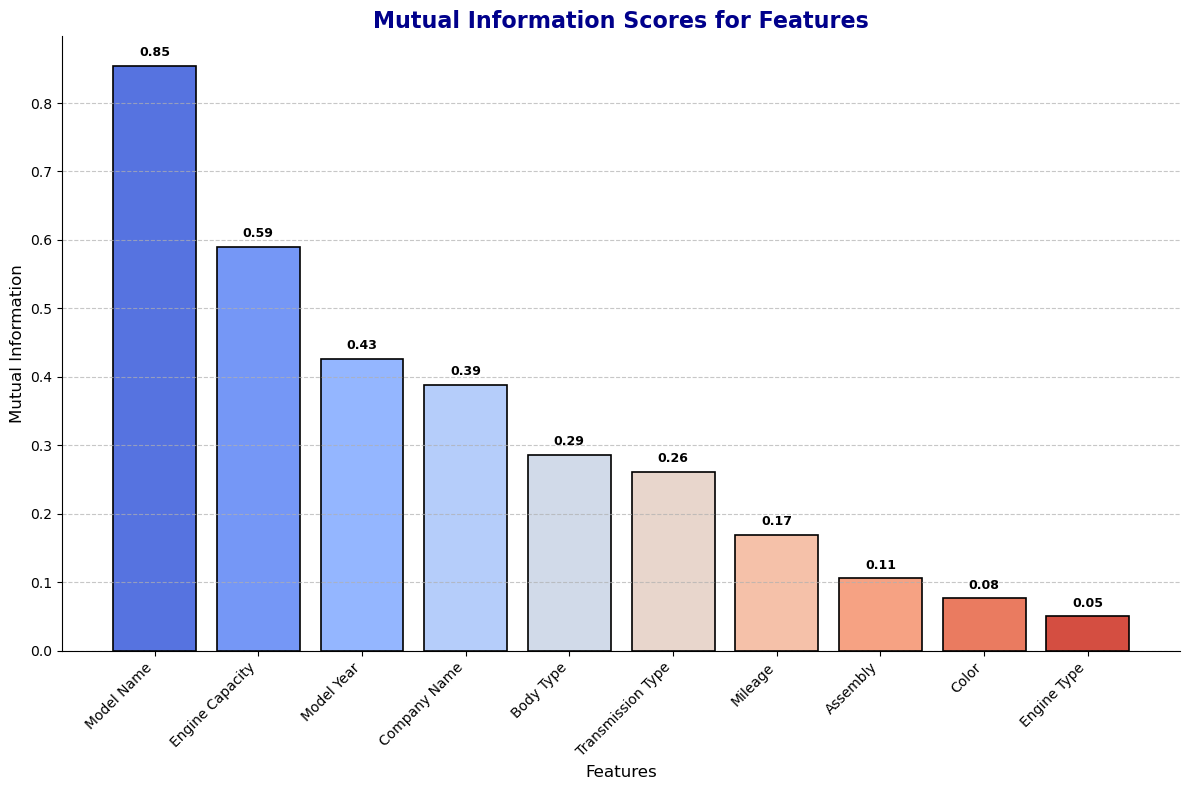

In [170]:

# Compute mutual information scores
mi_scores = mutual_info_regression(x, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=x.columns)

# Sort scores in descending order
mi_scores = mi_scores.sort_values(ascending=False)

# Display the scores
print("Mutual Information Scores:")
print(mi_scores)

# Visualize the scores with customizations
plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", len(mi_scores))  # Custom color palette
bars = plt.bar(mi_scores.index, mi_scores.values, color=colors, edgecolor='black', linewidth=1.2)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Customize chart
plt.title("Mutual Information Scores for Features", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Mutual Information", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add style
sns.despine()  # Removes unnecessary chart borders
plt.tight_layout()

# Show the chart
plt.show()

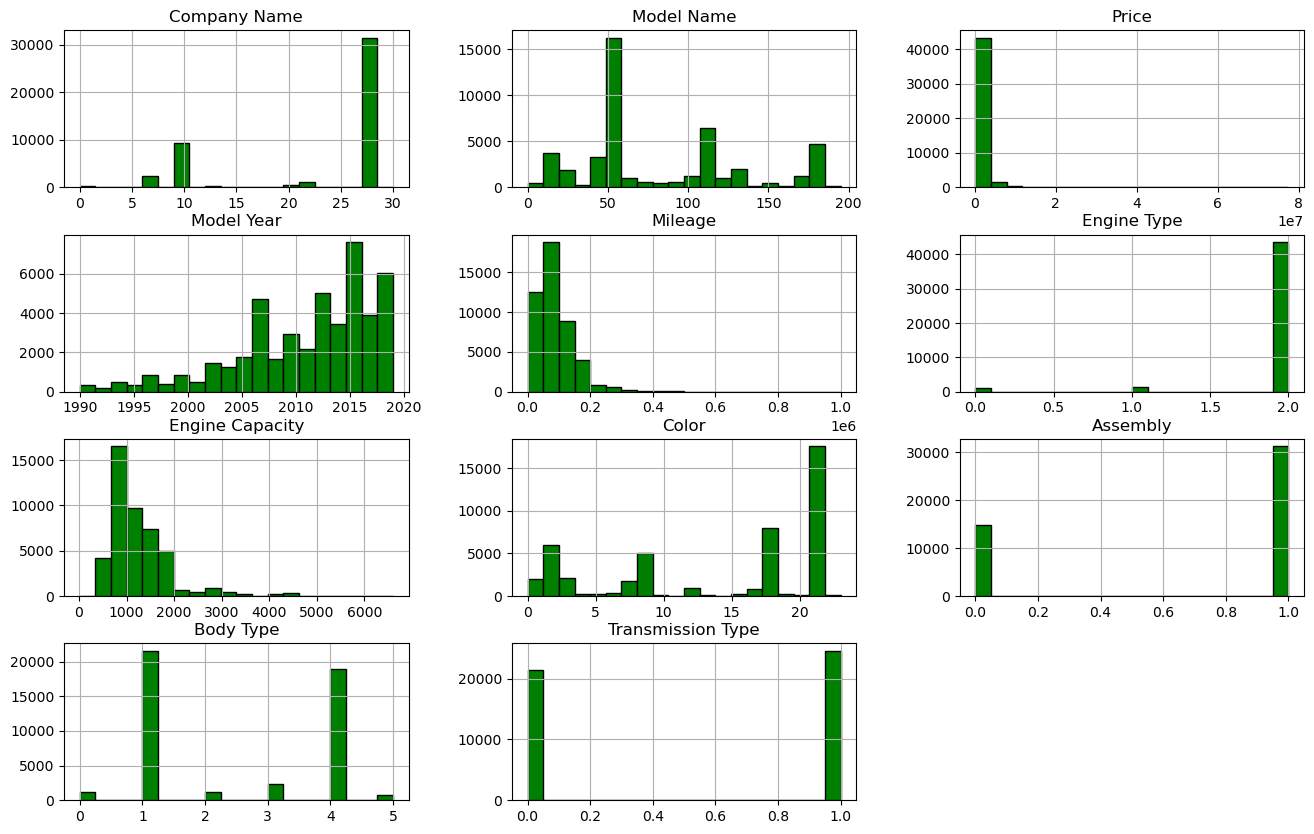

In [37]:
df.hist(figsize=(16, 10), bins=20, color='g', edgecolor='black')
plt.savefig("histogram_plot.png")
plt.show()

In [38]:
x=df.drop('Price',axis=1)
x.head()

,Company Name,Model Name,Model Year,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type
0,28,181,2017,9869,2,1000,18,0,1,0
1,28,53,2019,11111,2,1300,21,1,4,0
2,27,14,2019,17500,2,660,21,1,1,0
3,27,14,2019,9600,2,660,21,1,1,1
4,28,53,2010,120000,2,1300,2,1,4,1


In [40]:
y=df[['Price']]
y.head()

,Price
0,2385000
1,111000
2,1530000
3,1650000
4,1435000


## SPLITING DATA FOR TRAINING AND TESTING

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

# MODEL BUILDING AND HYPERPARAMETER TUNING

### LINEAR REGRESSION MODEL

In [4]:
from sklearn.linear_model import LinearRegression

In [87]:


lasso_grids = {
    'alpha': [0.01, 0.1, 1],
    'max_iter': [20, 50]
}

lasso_model = Lasso()# Defining the model

# Perform Grid Search with Cross-Validation
gscv = GridSearchCV(estimator=lasso_model, param_grid=lasso_grids, cv=5, scoring='r2', n_jobs=-1)
gscv.fit(x_train, y_train)

# Get the best model and parameters
best_model = gscv.best_estimator_
best_parameters = gscv.best_params_

# Evaluate performance
train_score = r2_score(y_train, best_model.predict(x_train))
test_score = r2_score(y_test, best_model.predict(x_test))

# Store results
result = {
    "Best parameters": best_parameters,
    "Train score": train_score,
    "Test score": test_score
}

# Print the result
print(result)


{'Best parameters': {'alpha': 1, 'max_iter': 50}, 'Train score': 0.5884057847160326, 'Test score': 0.5435376644804062}


### DECISIONTREE 

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
decisionparam_grids={'DecisionTreeRegressor':
                      {'max_depth':[3,5,6],
              'min_samples_leaf':[1,2],
              'min_samples_split':[2,5,10]}}

models={'DecisionTreeRegressor': DecisionTreeRegressor()}

result=[]
for model_name,model in models.items():
    gscv=GridSearchCV(estimator=model,param_grid=decisionparam_grids[model_name],cv=5,scoring='r2',n_jobs=-1)
    gscv.fit(x_train,y_train)
    best_model=gscv.best_estimator_
    best_parameters=gscv.best_params_
   _
    train_score=r2_score(y_train,best_model.predict(x_train))
    test_score=r2_score(y_test,best_model.predict(x_test))

    result.append({
        
        "Best parameters":best_parameters,
        "Train score":train_score,
        "Test score":test_score})

print (result)
                    

[{'Best parameters': {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10}, 'Train score': 0.9182310389046664, 'Test score': 0.9044534452910178}]


### RANDOMFOREST

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
randomparam_grids={'RandomForestRegressor':
                      {'max_depth':[3,5,6],
              'min_samples_leaf':[1,2],
              'min_samples_split':[2,5,10]}}

model2={'RandomForestRegressor': RandomForestRegressor()}

result=[]
for model_name,model in model2.items():
    gscv=GridSearchCV(estimator=model,param_grid=randomparam_grids[model_name],cv=5,scoring='r2',n_jobs=-1)
    gscv.fit(x_train,y_train)
    best_model=gscv.best_estimator_
    best_parameters=gscv.best_params_
    
    train_score=r2_score(y_train,best_model.predict(x_train))
    test_score=r2_score(y_test,best_model.predict(x_test))

    result.append({
        "Model":model_name,
        "Best parameters":best_parameters,
        "Train score":train_score,
        "Test score":test_score})

r=pd.DataFrame(result)
r.sort_values(by='Test score',ascending=False)

,Model,Best parameters,Train score,Test score
0,RandomForestRegressor,"{'max_depth': 6, 'min_samples_leaf': 1, 'min_s...",0.926247,0.906631


### XGBOOST REGRESSOR

In [30]:
from xgboost import XGBRegressor

In [31]:
xgbparam_grids={'XGB':
             {'learning_rate':[0.01,0.1,0.2],
              'max_depth':[4,6],
              'n_estimators':[50,100]}}

model3={'XGB': XGBRegressor()}

result=[]
for model_name,model in model3.items():
    gscv=GridSearchCV(estimator=model,param_grid=xgbparam_grids[model_name],cv=5,scoring='r2',n_jobs=-1)
    gscv.fit(x_train,y_train)
    best_model=gscv.best_estimator_
    best_parameters=gscv.best_params_
    
    train_score=r2_score(y_train,best_model.predict(x_train))
    test_score=r2_score(y_test,best_model.predict(x_test))

    result.append({
        "Model":model_name,
        "Best parameters":best_parameters,
        "Train score":train_score,
        "Test score":test_score})

print(result)

[{'Model': 'XGB', 'Best parameters': {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100}, 'Train score': 0.9756111724785435, 'Test score': 0.9503278619299558}]


### GRADIENTBOOST REGRESSOR

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
gbrparam_grids={'GBR':
             {'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}}

model4={'GBR': GradientBoostingRegressor()}

result=[]
for model_name,model in model4.items():
    gscv=GridSearchCV(estimator=model,param_grid=gbrparam_grids[model_name],cv=5,scoring='r2',n_jobs=-1)
    gscv.fit(x_train,y_train)
    best_model=gscv.best_estimator_
    best_parameters=gscv.best_params_

    train_score=r2_score(y_train,best_model.predict(x_train))
    test_score=r2_score(y_test,best_model.predict(x_test))

    result.append({
        "Model":model_name,
        "Best parameters":best_parameters,
        "Train score":train_score,
        "Test score":test_score})

print(result)

[{'Model': 'GBR', 'Best parameters': {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}, 'Train score': 0.9859050726247107, 'Test score': 0.9473496701194466}]


### KNN REGRESSOR

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
knnparam_grids={'KNN':
             {'n_neighbors':[3,5,7],
              'weights':['uniform','distance'],
              'metric':['euclidean','manhattan']}}

model5={'KNN': KNeighborsRegressor()}

result=[]
for model_name,model in model5.items():
    gscv=GridSearchCV(estimator=model,param_grid=knnparam_grids[model_name],cv=5,scoring='r2',n_jobs=-1)
    gscv.fit(x_train,y_train)
    best_model=gscv.best_estimator_
    best_parameters=gscv.best_params_
    #mean_cv_score=gscv.best_score_
    train_score=r2_score(y_train,best_model.predict(x_train))
    test_score=r2_score(y_test,best_model.predict(x_test))

    result.append({
        "Model":model_name,
        "Best parameters":best_parameters,
        "Train score":train_score,
        "Test score":test_score})

print(result)

[{'Model': 'KNN', 'Best parameters': {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}, 'Train score': 0.9992997727821383, 'Test score': 0.7963475027454192}]


In [36]:
prediction_model = XGBRegressor(gamma=1,learning_rate=0.2,max_depth=5,n_estimators=200,random_state=42)

In [37]:
prediction_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# SAVING THE BEST MODEL

In [67]:
import joblib

joblib.dump(prediction_model,'prediction_model')

['prediction_model']

# LOADING THE PREDICTED MODEL

In [70]:
joblib_reload = joblib.load('prediction_model')

In [75]:
df.head()

,Company Name,Model Name,Price,Model Year,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type
0,28,181,2385000,2017,9869,2,1000,18,0,1,0
1,28,53,111000,2019,11111,2,1300,21,1,4,0
2,27,14,1530000,2019,17500,2,660,21,1,1,0
3,27,14,1650000,2019,9600,2,660,21,1,1,1
4,28,53,1435000,2010,120000,2,1300,2,1,4,1


# PREDICT USING THE LOADED MODEL

In [73]:
joblib_reload.predict([[28,181,2017,9869.0,2,1000,18,0,1,0]])

array([2421981.], dtype=float32)